# Lab 3 - Unsupervised learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

from wordcloud import WordCloud, STOPWORDS
from time import time

---

# SMS spam detector

### Data import 

In [2]:
data_df = pd.read_csv("data/spam.csv", delimiter=',')
data_df.head()

,Category,Text
0,ham,Ok lar Joking wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor U c already then say
3,ham,Nah I don t think he goes to usf he lives aro...
4,spam,FreeMsg Hey there darling it s been 3 week s n...


## Word cloud

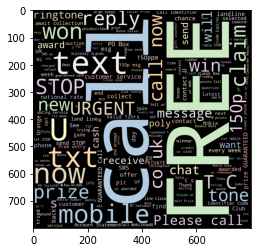

In [3]:
spam_df = data_df[ data_df["Category"] == "spam"]
spam_df.head()
spam_words = ' '.join(list(spam_df["Text"].values))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                colormap='Pastel1',
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(spam_words)

plt.imshow(wordcloud) 

In [5]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data_df["Text"].values)
Y = data_df.iloc[:, :1].values

clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, Y)
print(f"Accuracy: {clf.score(X, Y)}")

Accuracy: 0.927494615936827
